In [1]:
import pandas as pd
import numpy as np



def get_max_value(series1, series2):
    # return the max value of series1 and series2
    max_value = pd.concat([series1, series2]).max()
    return max_value

def get_min_value(series1, series2):
    # return the min value of series1 and series2
    min_value = pd.concat([series1, series2]).min()
    return min_value

def get_min_max(series1, series2):
    # return the min and max values of series1 and series2
    min_value = get_min_value(series1, series2)
    max_value = get_max_value(series1, series2)
    return min_value, max_value

def squared_error(true_value, predicted_value):
    # return the squared error between true and predicted values
    return (true_value - predicted_value)

def construct_target(feature1, feature2):
    # Perform calculations to determine feature3
    target = feature1 + feature2*feature1  # Example calculation, replace with your own logic
    
    return target

def combine_populations(df1, df2):
    # Combine the two DataFrames and shuffle the data
    combined_df = pd.concat([df1, df2], ignore_index=True, axis=0).sample(frac=1).reset_index(drop=True)
    return combined_df

from sklearn.linear_model import LinearRegression
def fit_model(combined_df, features, target):
    # Create an instance of the LinearRegression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(combined_df[features], combined_df[target])

    return model


import matplotlib.pyplot as plt
def plot_variable_distribution(orange_pop, green_pop, var, bins=100, range=None, normalise=True):
    # Plot the distribution of a variable in the two populations

    if range is None:
        min, max = get_min_max(orange_pop[var], green_pop[var])
    else:
        min = range[0]
        max = range[1]    
    with plt.xkcd():
        plt.hist(orange_pop[var], density=normalise, bins=bins, range=(min,max), alpha=0.5, color='orange', label='Orange')
        plt.hist(green_pop[var],  density=normalise, bins=bins, range=(min,max), alpha=0.5, color='green',  label='Green')
        plt.legend()
        plt.title(f'Distribution of {var} in the two populations')
    plt.show()  


def add_prediction_to_df(df, model, features, threshold):
    # Add a prediction column to the DataFrame
    df['Predicted'] = model.predict(df[features])
    df['Squared_Error'] = squared_error(df['Target'], df['Predicted'])
    df['Target_thres'] = df['Target'].apply(lambda x: 1 if x > threshold else 0)
    df['Predicted_thres'] = df['Predicted'].apply(lambda x: 1 if x > threshold else 0)
    return df      

In [2]:
import matplotlib.font_manager
#matplotlib.font_manager._rebuild()

matplotlib.font_manager.findfont('xcxd Script')

#matplotlib.rcParams['font.family'] = "xkcd Script"
#matplotlib.rcParams['font.sans-serif'] = "Humor Sans"

findfont: Font family ['xcxd Script'] not found. Falling back to DejaVu Sans.


'/Users/rprabhu/Ana/FAT/Fairness/fairness-docs/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [3]:
#%pip install numpy
import numpy as np
import pandas as pd 

def generate_random_population(n:int, 
                               mean, 
                               cov, 
                               label:str):
    """
    Generate a random population from a random multivariate_normal distribution.

    Parameters:
    - n (int): The size of the population.
    - mean (float): The mean of the distribution.
    - cov (float): The covariance of the distribution.

    Returns:
    - population (pandas DataFrame): population generated from the distribution.
    """
    def _construct_target(feature1, feature2):
        # Perform calculations to determine feature3
        target = feature1 + feature2*feature1  # Example calculation, replace with your own logic
    
        return target

    pop = np.random.multivariate_normal(mean, cov, n)

    population = pd.DataFrame(pop, columns=['Feature1', 'Feature2'])  
    population['Target'] = _construct_target(population['Feature1'], population['Feature2'])
    population['Population'] = label

    return population


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

def get_performance_numbers(df:pd.DataFrame, target:str, prediction:str)->None:
    """
    Get the performance numbers of the model.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the predictions and the true values.

    Returns:
    - None
    """
    # Filter the dataframe for orange and green populations
    orange_df = df[df.Population == 'Orange']
    green_df  = df[df.Population == 'Green']

    # Create confusion matrix for orange population
    orange_true_labels = orange_df[target]
    orange_pred_labels = orange_df[prediction]
    orange_cm = confusion_matrix(orange_true_labels, orange_pred_labels, normalize='true')

    # Create confusion matrix for green population
    green_true_labels = green_df[target]
    green_pred_labels = green_df[prediction]
    green_cm = confusion_matrix(green_true_labels, green_pred_labels, normalize='true')

    # Print the confusion matrices
    print("Confusion Matrix for Orange Population:")
    print(orange_cm)
    print("\nConfusion Matrix for Green Population:")
    print(green_cm)


    balanced_acc_green = balanced_accuracy_score(green_true_labels, green_pred_labels)
    balanced_acc_orange = balanced_accuracy_score(orange_true_labels, orange_pred_labels)
    print("Balanced Accuracy green:", balanced_acc_green)
    print("Balanced Accuracy orange:", balanced_acc_orange)


    bacc = pd.DataFrame([[balanced_acc_orange, balanced_acc_green]], columns=['Orange', 'Green'])
    with plt.xkcd():
        barlist=plt.barh([0,1],[balanced_acc_orange, balanced_acc_green])
        barlist[0].set_color('orange')
        barlist[1].set_color('green')
        plt.title('Balanced Accuracy for Orange and Green Populations')
        plt.ylabel('Balanced Accuracy')
        plt.yticks([0,1], ['Orange', 'Green'])
        plt.show()

# Et land med gule og grønne

La oss tenke oss et land med gule og grønne mennesker. Vi skal lage en ML-basert tjeneste for disse. De er like på de fleste måter, men på noen områder er de grønne litt forskjellige fra de gule. 

De grønne er en minoritet. Det er 10 ganger flere gule færre av disse. 

/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75947/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)
/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75947/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

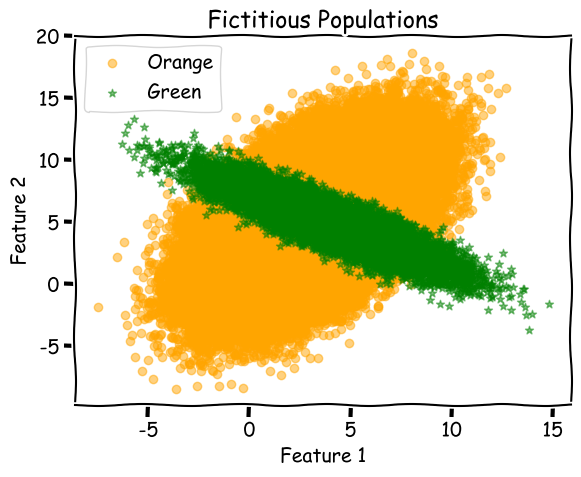

In [5]:
import numpy as np

# Orange population
orange_mean = [3, 5]
orange_cov = [[4.8, 10.3], [4, 1.2]]
orange_N = 200000
# Green population
green_mean = [4, 5]
green_cov = [[-2.5, 1], [8.6, -6]]
green_N = int(orange_N / 10)


green_pop  = generate_random_population(n=green_N,
                                        mean=green_mean,
                                        cov=green_cov,
                                        label='Green'
                                        )
orange_pop = generate_random_population(n=orange_N,
                                        mean=orange_mean,
                                        cov=orange_cov,
                                        label='Orange'
                                        ) 



import matplotlib.pyplot as plt


# Plot the data
with plt.xkcd():
    plt.scatter(orange_pop['Feature1'], orange_pop["Feature2"], color='orange', label='Orange', alpha=0.5)
    plt.scatter(green_pop["Feature1"], green_pop["Feature2"], color='green', marker='*', label='Green', alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Fictitious Populations')
    plt.show()


Vi skal bygge en modell med bare to variabler. I begge er de grønne og de gule ganske like, men noen forskjeller ser vi allikevel:

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

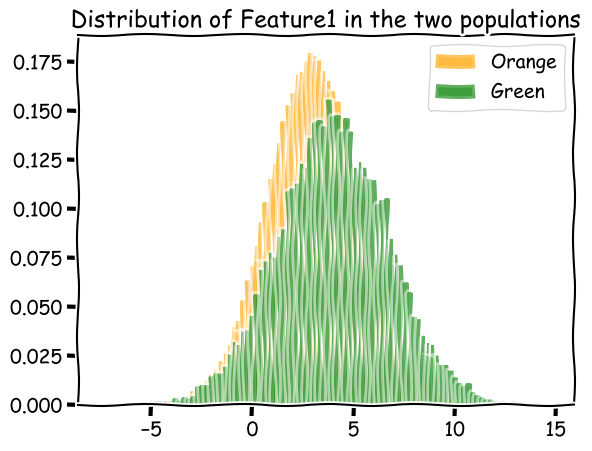

In [6]:
var = 'Feature1'
plot_variable_distribution(orange_pop, green_pop, var)

I denne variabelen er de grønne lettere forskjøvet mot høyre ift de gule.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

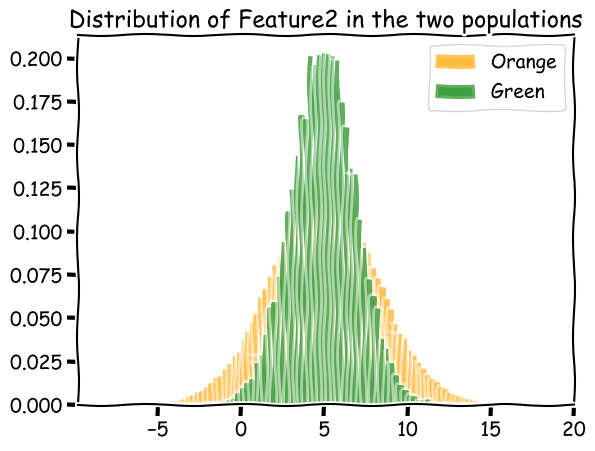

In [7]:
plot_variable_distribution(orange_pop, green_pop, var='Feature2')

I denne variablene er fordelingen til de gule mer spredt enn for de grønne.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

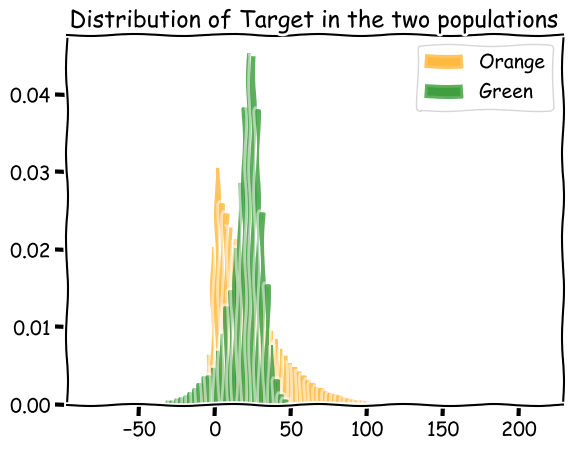

In [8]:
plot_variable_distribution(orange_pop, green_pop, var='Target')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

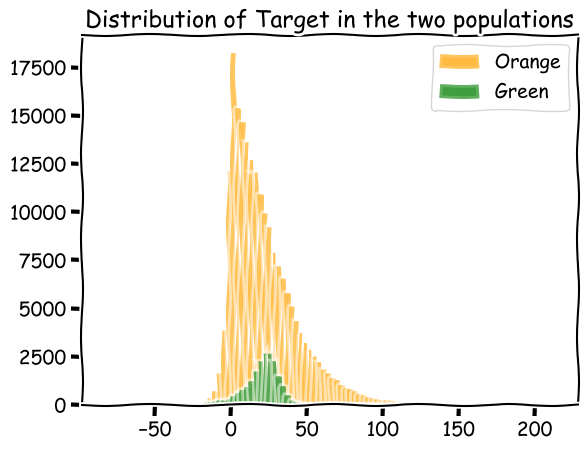

In [9]:
plot_variable_distribution(orange_pop, green_pop, var='Target', normalise=False)

Ser vi på variabelen vi ønsker å predikere, så ser vi at de grønne har og de gule er lettere forkjøvet i forhold til hverandre. Men de grønne er bare en liten del av befolkningen, så vi tenker at det ikke har så mye å si at de oppfører seg litt annerledes:

In [10]:
plt.scatter(orange_pop['Feature2'], orange_pop['Target'], color='orange', label='Orange')
plt.scatter(green_pop['Feature2'], green_pop['Target'], color='green', label='Green') 

In [11]:
import pandas as pd

# Assuming green_pop and orange_pop are the dataframes you want to combine
#green_pop['Population'] = '1'
#orange_pop['Population'] = '0' 
thres = 20.
combined_df = combine_populations(green_pop, orange_pop)
#combined_df['Feature3_thres'] = combined_df['Feature3'].apply(lambda x: 1 if x > thres else 0) 
combined_df.head()


,Feature1,Feature2,Target,Population
0,1.856949,2.804389,7.064557,Orange
1,7.651757,10.539773,88.299531,Orange
2,5.780977,9.437630,60.339698,Orange
3,4.584866,5.477102,29.696650,Orange
4,5.210036,6.525163,39.206366,Orange


Vi tilpasser en modell basert på de to variablene:

In [12]:

# Fit the model
features = ['Feature1', 'Feature2']
target = 'Target'
model = fit_model(combined_df, features, target)
model.coef_

array([5.72918366, 3.1395265 ])

In [13]:
combined_df = add_prediction_to_df(combined_df, model, features, thres)
combined_df.head()

,Feature1,Feature2,Target,Population,Predicted,Squared_Error,Target_thres,Predicted_thres
0,1.856949,2.804389,7.064557,Orange,7.513553,-0.448996,0,0
1,7.651757,10.539773,88.299531,Orange,64.998511,23.301020,1,1
2,5.780977,9.437630,60.339698,Orange,50.820265,9.519433,1,1
3,4.584866,5.477102,29.696650,Orange,31.533347,-1.836697,1,1
4,5.210036,6.525163,39.206366,Orange,38.405469,0.800897,1,1


La oss nå prøve ut modellen på 1000 grønne og 1000 guler personer som modellen ikke har sett før:

In [14]:
# Generate new populations with similars statistical traits
N_new = 1000
green_pop_test = generate_random_population(n=N_new,mean=green_mean,cov=green_cov,label='Green')
orange_pop_test = generate_random_population(n=N_new,mean=orange_mean,cov=orange_cov,label='Orange') 

combined_test_df = combine_populations(green_pop_test, orange_pop_test)


combined_test_df = add_prediction_to_df(df=combined_test_df,
                                        model=model, 
                                        features=['Feature1', 'Feature2'], 
                                        threshold=20.)

combined_test_df.head()

/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75947/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)
/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75947/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)


,Feature1,Feature2,Target,Population,Predicted,Squared_Error,Target_thres,Predicted_thres
0,2.719810,4.976945,16.256152,Green,19.277836,-3.021684,0,0
1,3.473216,5.336684,22.008668,Green,24.723646,-2.714978,1,1
2,5.764419,3.627972,26.677566,Green,32.485822,-5.808257,1,1
3,3.711121,5.881620,25.538524,Orange,27.797492,-2.258968,1,1
4,4.074593,5.432125,26.208291,Green,28.468688,-2.260397,1,1


Selv om vi har kjørt modellen på 1000 grønne og 1000 gule personer, så har modellen sett betydelig færre eksmepler av de grønne. Dette gjør at modellen trolig har vanskeligere for å predikere riktig for de grønne enn de gule.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

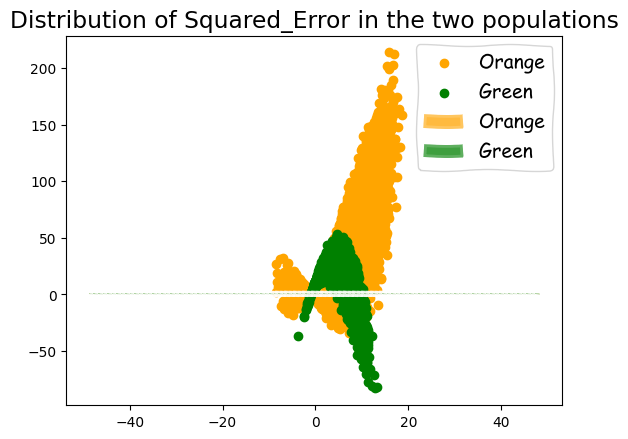

In [15]:
plot_variable_distribution(combined_test_df[combined_test_df.Population=='Green'],
                           combined_test_df[combined_test_df.Population=='Orange'],
                           'Squared_Error',
                            #range=[-2, 2]
                           )

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

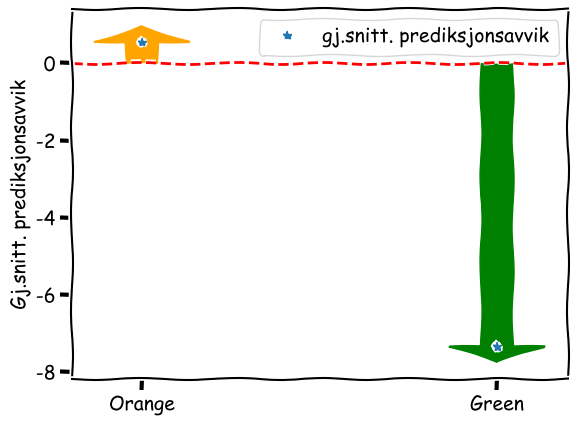

In [16]:
import matplotlib.pyplot as plt

def plot_mean_std(orange_error, green_error):

    with plt.xkcd():
        # Plot the mean values
        plt.plot([0, 1], [orange_error.mean(), green_error.mean()], marker='*', linestyle='', label='gj.snitt. prediksjonsavvik')

        # Plot the standard deviations as error bars
        #plt.errorbar([0, 1], [orange_error.mean(), green_error.mean()], yerr=[orange_error.std(), green_error.std()], linestyle='', color='black',marker='', label='std. avvik')

        # Set the x-axis tick labels
        plt.xticks([0, 1], ['Orange', 'Green'])

        # Draw a horizontal line at 0
        plt.axhline(y=0, color='r', linestyle='--')
        # function to add arrow on a graph
        plt.arrow(0,0,0,orange_error.mean(),width=0.09, color='orange')
        plt.arrow(1,0,0,green_error.mean(),width=0.09, color='green')


        # Set the y-axis label
        plt.ylabel('Gj.snitt. prediksjonsavvik')

        # Add a legend
        plt.legend()

        # Show the plot
        plt.show()


plot_mean_std(combined_test_df[combined_test_df.Population=='Orange']['Squared_Error'], 
              combined_test_df[combined_test_df.Population=='Green']['Squared_Error'], 
)

Vi ser at feilen er større for de grønne enn for de gule. Dette er fordi modellen har sett færre eksempler av de grønne.

La oss se hvordan modellen gjør det i stort for de gule og de grønne:

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

Confusion Matrix for Orange Population:
[[8.48434679e-01 1.51565321e-01]
 [9.25443924e-05 9.99907456e-01]]

Confusion Matrix for Green Population:
[[0.6212761 0.3787239]
 [0.        1.       ]]
Balanced Accuracy green: 0.8106380483227773
Balanced Accuracy orange: 0.9241710674189703


findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 

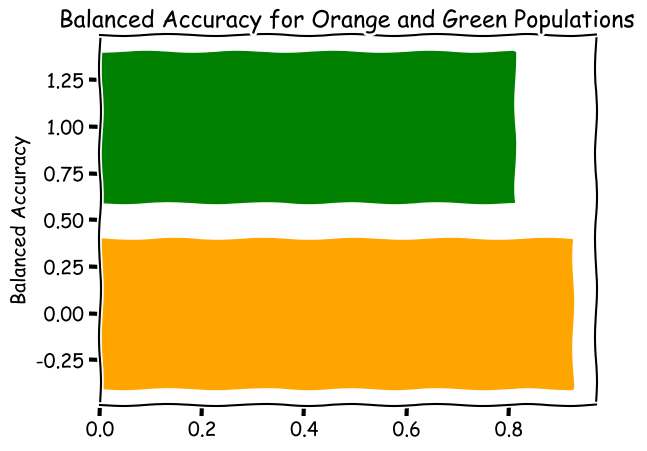

In [31]:
get_performance_numbers(combined_df, target='Target_thres', prediction='Predicted_thres')

Vi ser at modellen gjør det litt bedre for de gule enn for de grønne -- 11 prosentpoeng. Dette er fordi modellen har sett færre eksempler av de grønne og fordi de grønne oppfører seg litt annerledes enn den gule majoriteten. 



# Introduce bias

La oss se hva som skjer når vi innfører litt bias i den første distribusjonen til den grønne populasjonen.

In [ ]:
import numpy as np
from scipy.stats import norm

def shift_normal_distribution(data, mean_shift, sigma_shift):
    # Shift the mean
    shifted_data = data + mean_shift
    
    # Scale the data to adjust the standard deviation
    scaled_data = shifted_data * (sigma_shift / np.std(shifted_data))
    
    return scaled_data




In [ ]:
# Improved performance
#mean_shift =-.9
#sigma_shift =3.0

# degraded performance
mean_shift =0.0
sigma_shift =5

/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75796/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)
/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75796/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'x

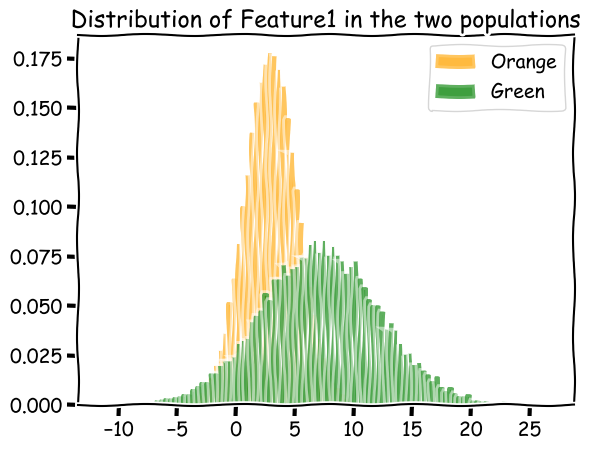

In [ ]:
green_pop = generate_random_population(n=green_N, mean=green_mean, cov=green_cov, label='Green')
orange_pop = generate_random_population(n=orange_N, mean=orange_mean, cov=orange_cov, label='Orange')  


green_pop['Feature1'] = shift_normal_distribution(green_pop.Feature1, mean_shift=mean_shift, sigma_shift=sigma_shift)  
orange_pop['Feature1'] = orange_pop.Feature1 #shift_normal_distribution(orange_pop.Feature1, mean_shift=5, sigma_shift=2)
plot_variable_distribution(orange_pop, green_pop, var='Feature1')

In [ ]:
combined_df = combine_populations(green_pop, orange_pop)
combined_df.head()


,Feature1,Feature2,Target,Population
0,0.020410,4.726373,0.116877,Orange
1,7.727322,3.797822,37.074312,Orange
2,0.328718,7.006926,2.632021,Orange
3,3.507650,4.655296,19.836796,Orange
4,0.548307,1.124897,1.165096,Orange


In [ ]:
# model with biased distribution

features = ['Feature1', 'Feature2']
target = 'Target'

model_biased = fit_model(combined_df, features, target)
model_biased.coef_

array([3.72235678, 3.90046666])

In [ ]:
# generate new populations with similar statistical traits
green_pop_test = generate_random_population(n=N_new,mean=green_mean,cov=green_cov,label='Green')
green_pop_test['Feature1'] = shift_normal_distribution(green_pop_test.Feature1, mean_shift=mean_shift, sigma_shift=sigma_shift)
orange_pop_test = generate_random_population(n=N_new,mean=orange_mean,cov=orange_cov,label='Orange')

combined_test_df = combine_populations(green_pop_test, orange_pop_test)
combined_test_df = add_prediction_to_df(df=combined_test_df,
                                        model=model_biased, 
                                        features=['Feature1', 'Feature2'], 
                                        threshold=20.)


/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75796/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)
/var/folders/_v/x54vkdnj7mb06jj32gmyg8sw0000gn/T/ipykernel_75796/1537036078.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pop = np.random.multivariate_normal(mean, cov, n)


In [22]:
get_performance_numbers(combined_test_df, target='Target_thres', prediction='Predicted_thres')


Confusion Matrix for Orange Population:
[[0.85211268 0.14788732]
 [0.         1.        ]]

Confusion Matrix for Green Population:
[[0.63023256 0.36976744]
 [0.         1.        ]]
Balanced Accuracy green: 0.8151162790697675
Balanced Accuracy orange: 0.926056338028169


TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
import pandas as pd
from roughviz.charts import Pie, Scatter, Bar


data = {
    "labels": ["North", "South", "East", "West"],
    "values": [10, 5, 8, 3]
}

bar = Bar(data=data, title="Regions", title_fontsize=3)
bar.set_xlabel("Region", fontsize=2)
bar.set_ylabel("Number", fontsize=2)

bar.show()

In [ ]:
import pandas as pd
from roughviz.charts import Pie, Scatter

df = pd.DataFrame({"a": ["a", "b"], "b": [1, 2], "c": [2, 3]})

# pie plot
pie = Pie(data=df, labels="a", values="b")

# scatter plot
scatter = Scatter(data=df, x="b", y="c")

pie.show()